Radius: 0.86005
[[Model]]
    Model(float_norms)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 110
    # variables        = 10
    chi-square         = 130.972197
    reduced chi-square = 1.30972197
    Akaike info crit   = 39.1955169
    Bayesian info crit = 66.2003205
[[Variables]]
    c1:     0.12328439 +/- 0.00350912 (2.85%) (init = -0.12)
    Set_1:  1.00298862 +/- 0.00128797 (0.13%) (init = 1)
    Set_2:  1.00090323 +/- 0.00117139 (0.12%) (init = 1)
    Set_3:  1.00045122 +/- 0.00131002 (0.13%) (init = 1)
    ns1:    0.99738016 +/- 0.00309369 (0.31%) (init = 1)
    ns2:    0.99805467 +/- 0.00200244 (0.20%) (init = 1)
    nr:     0.99755052 +/- 0.00195458 (0.20%) (init = 1)
    nb1:    0.98896385 +/- 0.00220903 (0.22%) (init = 1)
    nb2:    0.98658574 +/- 0.00292737 (0.30%) (init = 1)
    nm:     0.99836534 +/- 0.00196048 (0.20%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, Set_1)    =  0.87

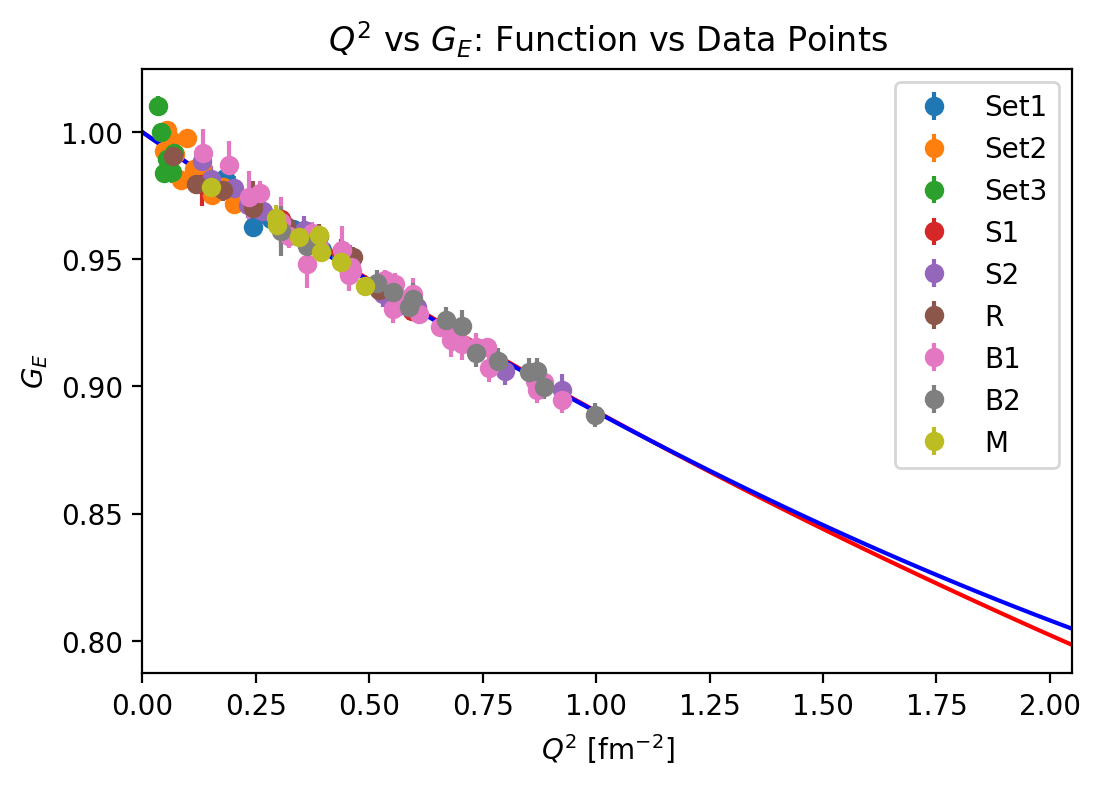

In [21]:
#Graph First Time
%matplotlib inline

##Import Packages
import random
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model, Parameters

##Function Storage
#Float Function for Modeling/Regression
def floats(q2,c1,c2,c3,Set_1,Set_2,Set_3,ns1,ns2,nr,nb1,nb2,nm):
    fSet1= Set_1*(1+c1*Set1[0:,0]*25.7+(c2*(Set1[0:,0]*25.7)**2+c3*(Set1[0:,0]*25.7)**3))
    fSet2= Set_2*(1+c1*Set2[0:,0]*25.7+(c2*(Set2[0:,0]*25.7)**2+c3*(Set2[0:,0]*25.7)**3))
    fSet3= Set_3*(1+c1*Set3[0:,0]*25.7+(c2*(Set3[0:,0]*25.7)**2+c3*(Set3[0:,0]*25.7)**3))
    f1= ns1*(1+c1*S1[0:,0]+(c2*S1[0:,0]**2)+(c3*S1[0:,0]**3))
    f2= ns2*(1+c1*S2[0:,0]+(c2*S2[0:,0]**2)+(c3*S2[0:,0]**3))
    f3=  nr*(1+c1*R[0:,0] +(c2*R[0:,0]**2)+(c3*R[0:,0]**3))
    f4= nb1*(1+c1*B1[0:,0]+(c2*B1[0:,0]**2)+(c3*B1[0:,0]**3))
    f5= nb2*(1+c1*B2[0:,0]+(c2*B2[0:,0]**2)+(c3*B2[0:,0]**3))
    f6=  nm*(1+c1*M[0:,0] +(c2*M[0:,0]**2)+(c3*M[0:,0]**3))
    return np.concatenate((fSet1,fSet2,fSet3,f1,f2,f3,f4,f5,f6))

def float_norms(q2,c1,Set_1,Set_2,Set_3,ns1,ns2,nr,nb1,nb2,nm):
    fSet1= Set_1*((1+c1*Set1[0:,0]*25.7)**Power)
    fSet2= Set_2*((1+c1*Set2[0:,0]*25.7)**Power)
    fSet3= Set_3*((1+c1*Set3[0:,0]*25.7)**Power)
    f1= ns1*((1+c1*S1[0:,0])**Power)
    f2= ns2*((1+c1*S2[0:,0])**Power)
    f3=  nr*((1+c1*R[0:,0])**Power)
    f4= nb1*((1+c1*B1[0:,0])**Power)
    f5= nb2*((1+c1*B2[0:,0])**Power)
    f6=  nm*((1+c1*M[0:,0])**Power)
    return np.concatenate((fSet1,fSet2,fSet3,f1,f2,f3,f4,f5,f6))

#Power
Power=-1

#Read Data Files
S1=np.loadtxt('+S1sort.dat')
S2=np.loadtxt('+S2sort.dat')
R=np.loadtxt('+Rsort.dat')
B1=np.loadtxt('+B1sort.dat')
B2=np.loadtxt('+B2sort.dat')
M=np.loadtxt('+Msort.dat')

##Import Data (Data Used by Rosenfelder)
Set1=np.loadtxt('New_Data(0.495_GeV).dat')
Set2=np.loadtxt('New_Data(0.330_GeV).dat')
Set3=np.loadtxt('New_Data(0.195_GeV).dat')


##Generate Synthetic Data
#Super Loop (Loops Over Everything)
Loop=1
All_GE=[]
Real_Params=[]
X=0
while X<Loop:
    #Paramaters
    params = Parameters()
    params.add('c1',  value=-0.12,vary=1)
    #Normailization Parameters
    params.add('Set_1', value=1,vary=1)
    params.add('Set_2', value=1,vary=1)
    params.add('Set_3', value=1,vary=1)
    params.add('ns1', value=1,vary=1)
    params.add('ns2', value=1,vary=1)
    params.add('nr',  value=1,vary=1)
    params.add('nb1', value=1,vary=1)
    params.add('nb2', value=1,vary=1)
    params.add('nm',  value=1,vary=1)

    #Concatenation
    q2   = np.concatenate((Set1[0:,0]*25.7,Set2[0:,0]*25.7,Set3[0:,0]*25.7,S1[0:,0],S2[0:,0],R[0:,0],B1[0:,0],B2[0:,0],M[0:,0]))
    data = np.concatenate((Set1[0:,3],Set2[0:,3],Set3[0:,3],S1[0:,1],S2[0:,1],R[0:,1],B1[0:,1],B2[0:,1],M[0:,1]))
    err  = np.concatenate((Set1[0:,2],Set2[0:,2],Set3[0:,2],S1[0:,2],S2[0:,2],R[0:,2],B1[0:,2],B2[0:,2],M[0:,2]))
    
    #Create Model
    model=Model(float_norms)
    result=model.fit(data,q2=q2,params=params,weights=1/err)
    #Model Report
    Real_Params=[]
    for name, par in result.params.items():
        Param=round(par.value,5)
        Real_Params.append(Param)        
    X+=1

#Print One to Test
print('Radius:',round((((-6*Real_Params[0])**2)**0.25),5))
print(result.fit_report())
    
##Plot (Plot Function & Last Set of Random Points)
#Analyze Data
c1=Real_Params[0]
#Plot 1
plt.figure(dpi=200)
plt.title('$Q^2$ vs $G_E$: Function vs Data Points')
plt.xlabel('$Q^2$ [fm$^{-2}$]')
plt.ylabel('$G_E$')

#Check
print(np.sum(data-(1+Real_Params[0]*q2)**Power))
print(np.sum(data-(1+-0.124*q2+0.014*q2**2)))

#Scatter Plot With Error Bars
plt.errorbar(Set1[:,0]*25.7,Set1[:,3]/Real_Params[1],yerr=Set1[:,2],fmt='o',label='Set1')
plt.errorbar(Set2[:,0]*25.7,Set2[:,3]/Real_Params[2],yerr=Set2[:,2],fmt='o',label='Set2')
plt.errorbar(Set3[:,0]*25.7,Set3[:,3]/Real_Params[3],yerr=Set3[:,2],fmt='o',label='Set3')
plt.errorbar(S1[:,0],S1[:,1]/Real_Params[4],yerr=S1[:,2],fmt='o',label='S1')
plt.errorbar(S2[:,0],S2[:,1]/Real_Params[5],yerr=S2[:,2],fmt='o',label='S2')
plt.errorbar(R[:,0],R[:,1]/Real_Params[6],yerr=R[:,2],fmt='o',label='R')
plt.errorbar(B1[:,0],B1[:,1]/Real_Params[7],yerr=B1[:,2],fmt='o',label='B1')
plt.errorbar(B2[:,0],B2[:,1]/Real_Params[8],yerr=B2[:,2],fmt='o',label='B2')
plt.errorbar(M[:,0],M[:,1]/Real_Params[9],yerr=M[:,2],fmt='o',label='M')
plt.xlim(0,2.05)
q2=np.linspace(0,2.05)
plt.plot(q2,(1+Real_Params[0]*q2)**Power,color='red')

#Controls
#Rosenfelder
plt.plot(q2,1+-0.124*q2+0.014*q2**2,color='blue')


plt.legend()
plt.show()

Radius: 0.85935
[[Model]]
    Model(float_norms)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 104
    # variables        = 9
    chi-square         = 101.503767
    reduced chi-square = 1.06846071
    Akaike info crit   = 15.4733214
    Bayesian info crit = 39.2728395
[[Variables]]
    c1:     0.12308102 +/- 0.00317101 (2.58%) (init = -0.12)
    Set_1:  1.00292357 +/- 0.00116373 (0.12%) (init = 1)
    Set_2:  1.00087875 +/- 0.00105806 (0.11%) (init = 1)
    ns1:    0.99729247 +/- 0.00279441 (0.28%) (init = 1)
    ns2:    0.99797310 +/- 0.00180902 (0.18%) (init = 1)
    nr:     0.99749764 +/- 0.00176552 (0.18%) (init = 1)
    nb1:    0.98885397 +/- 0.00199592 (0.20%) (init = 1)
    nb2:    0.98645435 +/- 0.00264469 (0.27%) (init = 1)
    nm:     0.99829519 +/- 0.00177098 (0.18%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, Set_1)    =  0.872
    C(c1, nb1)      =  0.858
    C(c1, nb2)      =  0.77

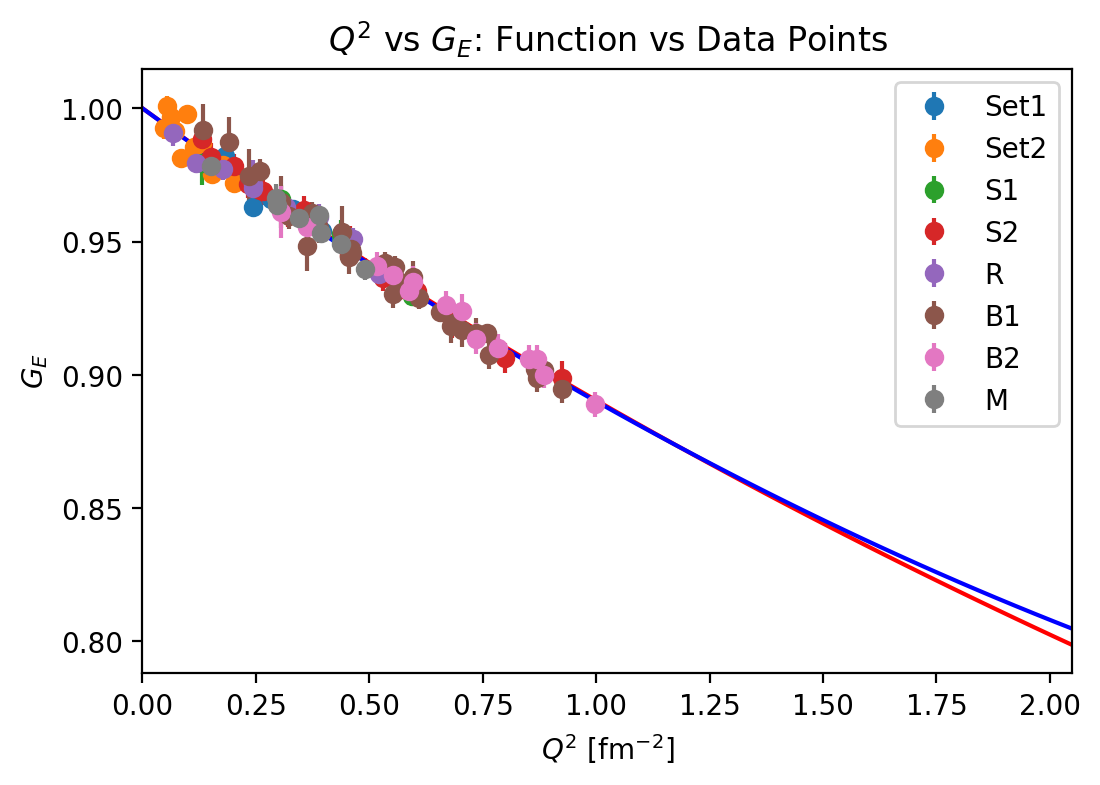

In [23]:
#Graph First Time
%matplotlib inline

##Import Packages
import random
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model, Parameters

##Function Storage
#Float Function for Modeling/Regression
def float_norms(q2,c1,Set_1,Set_2,ns1,ns2,nr,nb1,nb2,nm):
    fSet1= Set_1*((1+c1*Set1[0:,0]*25.7)**Power)
    fSet2= Set_2*((1+c1*Set2[0:,0]*25.7)**Power)
    f1= ns1*((1+c1*S1[0:,0])**Power)
    f2= ns2*((1+c1*S2[0:,0])**Power)
    f3=  nr*((1+c1*R[0:,0])**Power)
    f4= nb1*((1+c1*B1[0:,0])**Power)
    f5= nb2*((1+c1*B2[0:,0])**Power)
    f6=  nm*((1+c1*M[0:,0])**Power)
    return np.concatenate((fSet1,fSet2,f1,f2,f3,f4,f5,f6))

#Power
Power=-1

#Read Data Files
S1=np.loadtxt('+S1sort.dat')
S2=np.loadtxt('+S2sort.dat')
R=np.loadtxt('+Rsort.dat')
B1=np.loadtxt('+B1sort.dat')
B2=np.loadtxt('+B2sort.dat')
M=np.loadtxt('+Msort.dat')

##Import Data (Data Used by Rosenfelder)
Set1=np.loadtxt('New_Data(0.495_GeV).dat')
Set2=np.loadtxt('New_Data(0.330_GeV).dat')


##Generate Synthetic Data
#Super Loop (Loops Over Everything)
Loop=1
All_GE=[]
Real_Params=[]
X=0
while X<Loop:
    #Paramaters
    params = Parameters()
    params.add('c1',  value=-0.12,vary=1)
    #Normailization Parameters
    params.add('Set_1', value=1,vary=1)
    params.add('Set_2', value=1,vary=1)
    params.add('ns1', value=1,vary=1)
    params.add('ns2', value=1,vary=1)
    params.add('nr',  value=1,vary=1)
    params.add('nb1', value=1,vary=1)
    params.add('nb2', value=1,vary=1)
    params.add('nm',  value=1,vary=1)

    #Concatenation
    q2   = np.concatenate((Set1[0:,0]*25.7,Set2[0:,0]*25.7,S1[0:,0],S2[0:,0],R[0:,0],B1[0:,0],B2[0:,0],M[0:,0]))
    data = np.concatenate((Set1[0:,3],Set2[0:,3],S1[0:,1],S2[0:,1],R[0:,1],B1[0:,1],B2[0:,1],M[0:,1]))
    err  = np.concatenate((Set1[0:,2],Set2[0:,2],S1[0:,2],S2[0:,2],R[0:,2],B1[0:,2],B2[0:,2],M[0:,2]))
    
    #Create Model
    model=Model(float_norms)
    result=model.fit(data,q2=q2,params=params,weights=1/err)
    #Model Report
    Real_Params=[]
    for name, par in result.params.items():
        Param=round(par.value,5)
        Real_Params.append(Param)        
    X+=1

#Print One to Test
print('Radius:',round((((-6*Real_Params[0])**2)**0.25),5))
print(result.fit_report())
    
##Plot (Plot Function & Last Set of Random Points)
#Analyze Data
c1=Real_Params[0]
#Plot 1
plt.figure(dpi=200)
plt.title('$Q^2$ vs $G_E$: Function vs Data Points')
plt.xlabel('$Q^2$ [fm$^{-2}$]')
plt.ylabel('$G_E$')

#Check
print(np.sum(data-(1+Real_Params[0]*q2)**Power))
print(np.sum(data-(1+-0.124*q2+0.014*q2**2)))

#Scatter Plot With Error Bars
plt.errorbar(Set1[:,0]*25.7,Set1[:,3]/Real_Params[1],yerr=Set1[:,2],fmt='o',label='Set1')
plt.errorbar(Set2[:,0]*25.7,Set2[:,3]/Real_Params[2],yerr=Set2[:,2],fmt='o',label='Set2')
plt.errorbar(S1[:,0],S1[:,1]/Real_Params[3],yerr=S1[:,2],fmt='o',label='S1')
plt.errorbar(S2[:,0],S2[:,1]/Real_Params[4],yerr=S2[:,2],fmt='o',label='S2')
plt.errorbar(R[:,0],R[:,1]/Real_Params[5],yerr=R[:,2],fmt='o',label='R')
plt.errorbar(B1[:,0],B1[:,1]/Real_Params[6],yerr=B1[:,2],fmt='o',label='B1')
plt.errorbar(B2[:,0],B2[:,1]/Real_Params[7],yerr=B2[:,2],fmt='o',label='B2')
plt.errorbar(M[:,0],M[:,1]/Real_Params[8],yerr=M[:,2],fmt='o',label='M')
plt.xlim(0,2.05)
q2=np.linspace(0,2.05)
plt.plot(q2,(1+Real_Params[0]*q2)**Power,color='red')

#Controls
#Rosenfelder
plt.plot(q2,1+-0.124*q2+0.014*q2**2,color='blue')


plt.legend()
plt.show()